# Importando pacotes

In [1]:
# Importando alguns pacotes comuns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pacotes de Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Explorando os dados

In [4]:
boston_precos = load_boston()

In [5]:
X = pd.DataFrame(boston_precos.data, columns=boston_precos.feature_names)
Y = boston_precos.target

In [6]:
dados = X.copy()
dados['preco'] = Y

In [7]:
print(dados.shape)

(506, 14)


# Definir EQM

In [8]:
def eqm(y_verdadeiro,y_previsto):
    """
    Input: Dois vetores com a mesma dimensão
    Output: Escalar com o erro quadrático médio
    """
    return np.mean(np.square(y_verdadeiro - y_previsto))

# Modelo de ML

In [9]:
model = RandomForestRegressor()
model.fit(X,Y)
dados['preco_previsto'] = model.predict(X)

# Olhar o resultado

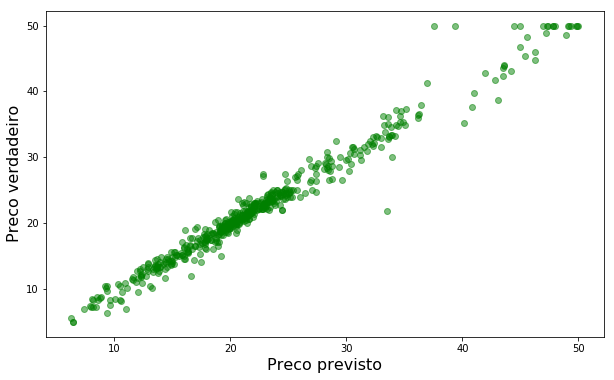

EQM no treino foi 2.371


In [10]:
plt.figure(figsize=(10,6))
plt.scatter(dados['preco_previsto'], dados['preco'], c="g", alpha=0.5)
plt.xlabel("Preco previsto", fontsize = 16)
plt.ylabel("Preco verdadeiro", fontsize = 16)
plt.show()
eqm_treino = eqm(dados['preco_previsto'],dados['preco'])
print('EQM no treino foi %.3f' %eqm_treino)

# Seperando os dados entre treino, validação e teste

In [11]:
X_treino, X_dev, Y_treino, Y_dev = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_teste, Y_val, Y_teste = train_test_split(X_dev, Y_dev, test_size=0.5, random_state=42)

In [12]:
variaveis = X_treino.columns

In [13]:
variaveis

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [14]:
??train_test_split

# Treinar 3 modelos no conjunto de treino

In [ ]:
??RandomForestRegressor

In [15]:
modelo1 = RandomForestRegressor(max_depth=2,random_state=12)
modelo1.fit(X_treino[variaveis], Y_treino)
X_treino['preco_previsto_1'] = modelo1.predict(X_treino[variaveis])
X_val['preco_previsto_1'] = modelo1.predict(X_val[variaveis])

In [16]:
modelo2 = RandomForestRegressor(max_depth=10,random_state=12)
modelo2.fit(X_treino[variaveis], Y_treino)
X_treino['preco_previsto_2'] = modelo2.predict(X_treino[variaveis])
X_val['preco_previsto_2'] = modelo2.predict(X_val[variaveis])

In [17]:
modelo3 = RandomForestRegressor(max_depth=None,random_state=12)
modelo3.fit(X_treino[variaveis], Y_treino)
X_treino['preco_previsto_3'] = modelo3.predict(X_treino[variaveis])
X_val['preco_previsto_3'] = modelo3.predict(X_val[variaveis])

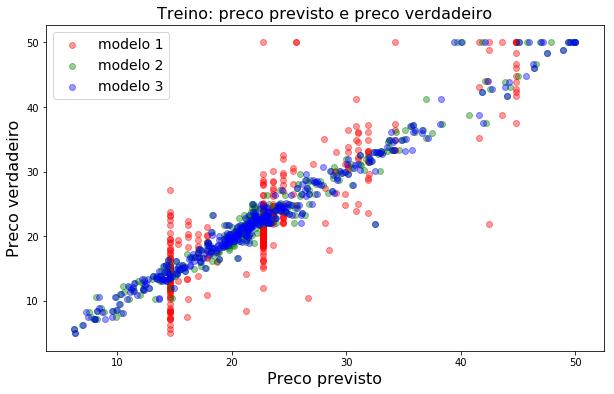

EQM da validação no modelo 1 foi 11.131
EQM da validação no modelo 2 foi 7.115
EQM da validação no modelo 3 foi 7.231


In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X_treino['preco_previsto_1'],Y_treino, c="r", alpha=0.4, label='modelo 1')
plt.scatter(X_treino['preco_previsto_2'],Y_treino, c="g", alpha=0.4, label='modelo 2')
plt.scatter(X_treino['preco_previsto_3'],Y_treino, c="b", alpha=0.4, label='modelo 3')
plt.title("Treino: preco previsto e preco verdadeiro", fontsize = 16)
plt.xlabel("Preco previsto", fontsize = 16)
plt.ylabel("Preco verdadeiro", fontsize = 16)
plt.legend(fontsize=14)
plt.show()
novo_eqm_val1 = eqm(X_val['preco_previsto_1'],Y_val)
novo_eqm_val2 = eqm(X_val['preco_previsto_2'],Y_val)
novo_eqm_val3 = eqm(X_val['preco_previsto_3'],Y_val)
print('EQM da validação no modelo 1 foi %.3f' %novo_eqm_val1)
print('EQM da validação no modelo 2 foi %.3f' %novo_eqm_val2)
print('EQM da validação no modelo 3 foi %.3f' %novo_eqm_val3)

# Vamos olhar o conjunto teste

In [19]:
X_teste['preco_previsto'] = modelo2.predict(X_teste[variaveis])

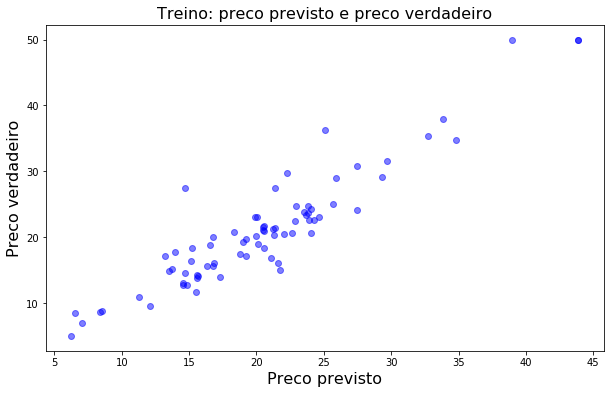

EQM do teste no modelo 2 foi 12.142


In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X_teste['preco_previsto'],Y_teste, c="b", alpha=0.5)
plt.title("Treino: preco previsto e preco verdadeiro", fontsize = 16)
plt.xlabel("Preco previsto", fontsize = 16)
plt.ylabel("Preco verdadeiro", fontsize = 16)
plt.show()
novo_eqm_treino = eqm(X_teste['preco_previsto'],Y_teste)
print('EQM do teste no modelo 2 foi %.3f' %novo_eqm_treino)